## *Computation of the iterated Aluthge, Duggal, and Mean transforms*

---



### Paper Abstraction

---

In this paper, we consider the computation of the Aluthge, Duggal, and Mean transforms of n × n matrices using the singular valued decomposition. We provide examples to illustrate the superiority of our technique in finding iterated Aluthge transform of a matrix over the more traditional methods. From the observations using Python, we know that the iterated Aluthge and Mean transforms of the matrices become normal. However, the iterated Duggal transform of the matrices may not be normal.


### Source Code

---


In [2]:
#Run me

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy

print("numpy version is",np.__version__)
print("matplotlib version is",matplotlib.__version__)

numpy version is 1.23.1
matplotlib version is 3.5.1


In [6]:
# Aluthge, Duggal, Mean Transformation

# Source Code

class Transformation():
    
    def __init__(self):
        
        self.color_dict={0:"magenta",1:"dimgray",2:"cyan"}
        self.type_dict={0:"Aluthge",1:"Duggal",2:"Mean"}
        self.type_dict_2= {v: k for k, v in self.type_dict.items()}

    def Epoch(self,T,Type,check_u=1): # one iteration 
        
        #Singular Value Decomposition
        w,sigma,v_h=np.linalg.svd(T)    
        sigma=np.diag(sigma) 
        v=v_h.H
        
        #Pre-calculation for Transformations 
        sigma_sq=np.sqrt(sigma)
        sigma_hat=v@sigma_sq@v_h 
        sigma_pinv=np.linalg.pinv(sigma)
        
        #Check which U do you want, unitary or partial isometry
        if self.check_u==1:
            u=w@sigma@sigma_pinv@v_h #check definition of u
        else :
            u=w@v_h
        
        T_abs=v@sigma@v_h
        
        #Compute each Transformation
        T_tilda=sigma_hat@u@sigma_hat
        T_duggal=T_abs@u
        T_mean=1/2*(T+T_duggal)
        
        if Type=="Aluthge":
            output=T_tilda
        elif Type=="Duggal":
            output=T_duggal
        else :
            output=T_mean
        
        return output #one epoch output
             
    def Transform(self,T,n=1,check_u=1): # n : iteration count 
        self.check_u=check_u
        Type_list=["Aluthge","Duggal","Mean"]
        
        self.T=T
        self.n=n
        self.total_info=[]

        for j in Type_list:
            before=copy.deepcopy(self.T)
        
            cal_info=[T]
        
            for i in range(self.n):
                
                after=self.Epoch(before,Type=j)
                cal_info.append(after)
                before=after
            
            self.total_info.append(cal_info)
        
        self.Aluthge_info=self.total_info[0]
        self.Duggal_info=self.total_info[1]
        self.Mean_info=self.total_info[2]
        
    def Normal_calculator(self): 
        self.norm_info=[[],[],[]] #list of Frobenius norm of each transformation output matrix
        self.normal_info=[[],[],[]] #list of Frobenius norm of each transformation output matrix
        
        for i in range(3):
            for j in self.total_info[i]:
                norm=np.linalg.norm(j)
                distance_matrix=np.abs(j@j.H-j.H@j)
                distance=np.linalg.norm(distance_matrix)
                self.normal_info[i].append(distance)
                self.norm_info[i].append(norm)
    
    
    def Normal_plot(self): # plot that dipicts Frobenius norm of T(T^*)-(T^*)T

        self.total_fig, self.total_ax=plt.subplots(1,1)
        
        for i in range(3):
            self.total_ax.plot(range(self.n+1),self.normal_info[i],color=self.color_dict[i],\
                               label=self.type_dict[i],alpha=0.5,marker="o",linestyle="dashed")
            self.total_ax.set_title("Normal Characteristic")
        
        self.total_fig.set_size_inches((16,4))
        self.total_ax.grid(axis='x', color='0.95',linestyle="--")
        self.total_ax.legend(title="Type")

        
    def Process(self,k,Type): #Method that check caculation process for each iteration
        
        M=self.total_info[self.type_dict_2[Type]][k-1]
        print("Input\n",np.round(M,4),"\n")
        
        w,sigma,v_h=np.linalg.svd(M)   
        sigma=np.diag(sigma) 
        v=v_h.H
                
        print("W\n",np.round(w,4),"\n")
        print("Sigma\n",np.round(sigma,4),"\n")
        print("V_h\n",np.round(v_h,4),"\n")
        print("W\Sigma V^*\n",np.round(w@sigma@v_h,4),"\n")
        print("WV^*\n",np.round(w@v_h,4),"\n")
        print("V\n",v,"\n")
        
        sigma_sq=np.sqrt(sigma)
        sigma_hat=v@sigma_sq@v_h
        sigma_pinv=np.linalg.pinv(sigma)
        
        if self.check_u==1:
            
            u=w@sigma@sigma_pinv@v_h #check definition of u
            print("U=W\Sigma\Sigma_pinv V^*\n",np.round(u,4),"\n")
        
        else :
            u=w@v_h
            print("U=WV^*\n",np.round(u,4),"\n")
        
    
        T_abs=v@sigma@v_h
        
        print("|T|\n",np.round(T_abs,4),"\n")
        
        print("U|T|\n",np.round(u@T_abs,4),"\n")

        if Type=="Aluthge":
            T_tilda=sigma_hat@w@v_h@sigma_hat
            print("T_tilda(a)\n",np.round(T_tilda,4),"\n")
        
        elif Type=="Duggal":
        
            T_duggal=T_abs@u
            print("T_duggal(a)\n",np.round(T_duggal,4),"\n")
        else :
            T_abs@u
            T_mean=(M+T_abs@u)/2
            
            print("|T|U",np.round(T_abs@u,4),"\n")
            print("T_mean(a)\n",np.round(T_mean,4),"\n")
        
        print("result from our Code(b)\n",np.round(self.total_info[self.type_dict_2[Type]][k],4))
        print("If (a)!=(b), Error.. ; If that happens, please send email us")
        print("E-mail : alsdn0110@snu.ac.kr")
        
        

### Manual

---

#### 1. `Transformation(T,n,check_u=1)` : iterate n times for each transformations (Aluthge, Duggal and Mean).

- Parameters

    `T` : matrix (`numpy.Matrix`)
    
    `n` : number of iteration
    
    `check_u` : if you want to calculate transformations with partial isomerty U, `check_u=1` (default).   


- Return
    
    The output is saved as a list in the following format.
     
`Transfomation.total_info=[Transfomation.Aluthge_info, Transfomation.Duggal_info, Transfomation.Mean_info]`

---

#### 2. `Transfomation.Normal_calculator()` : Norm and Normality Calculation Function.

where norm is *Frobenius norm*.

- `Transfomation.norm_info` : A list in which the norm of the Transformations is stored.
   
- `Transfomation.normal_info` : A list in which normal characteristic - $|T^{*}T-TT^{*}| - $ is stored.

---

#### 3. `Transformation.Process(k,Type)` : You can check the calculation process of a specific part.
    
- Parameters
    
    `k` : purpose number of repetitions ($1\leq k\leq n$)
    
    `Type` : `"Aluthge"`, `"Duggal"` or `"Mean"`


- Return

    Lists information from the implementation.

---

#### 4. ```Transformation.Plot()``` : plotting of normal characteristic.
   
   - axis X : number of iteration(`n`)
   
   - axis Y : normal characteristic for each transformations.

---
*Min Woo Park : Graduate School of Data Science, Seoul National University* - alsdn0110@snu.ac.kr 

*Ji Eun Lee : Department of Mathematics and Statistics, Sejong university* - jieunlee@sejong.ac.kr

### Example

---

#### Example 1. Invertible Matrix

---

In [4]:
# Ex1 
# Invertible matrix

# 1. Calculation Methods

T = np.matrix([[0,0,1],[1,1,0],[1,-1,0]])

Ex_1=Transformation() 

Ex_1.Transform(T,n=10) 

Ex_1.Normal_calculator() 

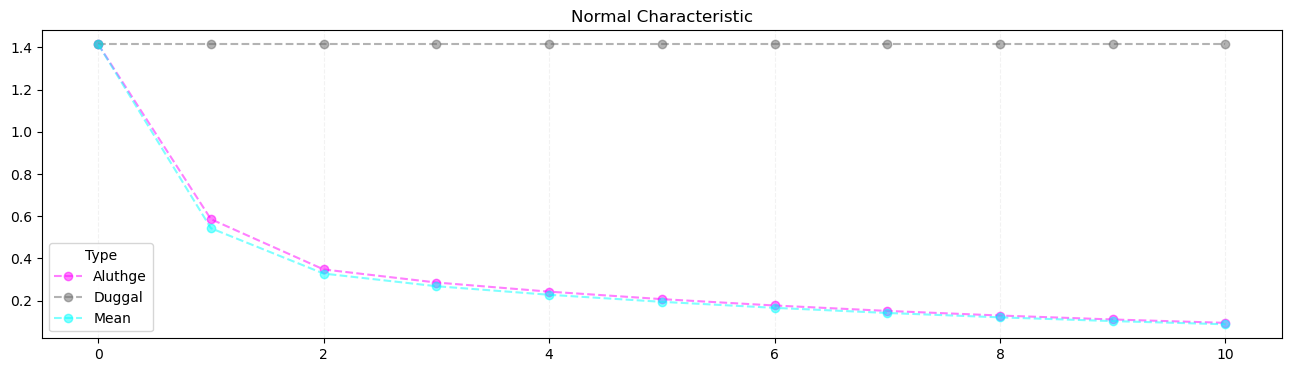

In [5]:
#2. Infomation Methods and Variables


#Ex_1.total_info

#Ex_1.Aluthge_info

#Ex_1.Duggal_info

#Ex_1.Mean_info

#Ex_1.norm_info

#Ex_1.normal_info

#Ex_1.Process(k=2, Type="Mean")

Ex_1.Normal_plot() 

#### Example 2. Non-invertible Matrix

---

In [54]:
# Ex2
# Non-Invertible matrix

# 1. Calculation Methods. 

T = np.matrix([[0,1,0,0],[0,0,2,0],[0,0,0,1],[0,0,0,0]])

Ex_2=Transformation()

Ex_2.Transform(T,10)

Ex_2.Normal_calculator()

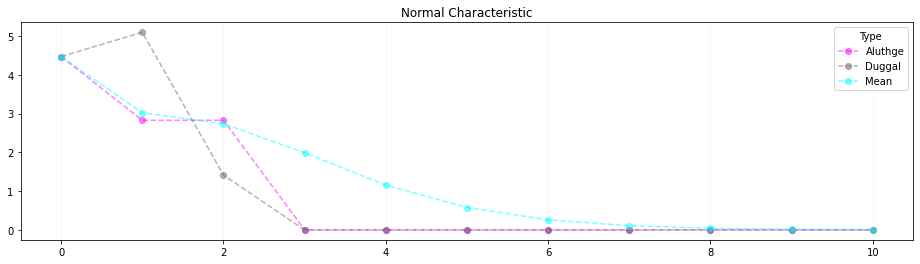

In [58]:
# 2. Infomation Methods and Variables


#Ex_2.total_info

#Ex_2.Aluthge_info

#Ex_2.Duggal_info

#Ex_2.Mean_info

#Ex_2.norm_info

#Ex_2.normal_info

#Ex_2.Process(k=1, Type="Aluthge")

Ex_2.Normal_plot()



#### Example 3. Non-invertible Matrix

---

In [50]:
# Ex3
# Non-Invertible matrix

# 1. Calculation Methods 

T = np.matrix([[2,1,-4],[-4,-1,6],[-2,2,-2]])

Ex_3=Transformation()

Ex_3.Transform(T,10)

Ex_3.Normal_calculator()


In [52]:
#2. Infomation Methods and Variables


#Ex_3.total_info

#Ex_3.Aluthge_info

#Ex_3.Duggal_info

#Ex_3.Mean_info

#Ex_3.norm_info

#Ex_3.normal_info

#Ex_3.Process(k=1, Type="Aluthge")

#Ex_3.Normal_plot()


#### Example 4. Non-invertible Matrix

---

In [49]:
# Ex4 
# Non-Invertible matrix

# 1. Calculation Methods 

T = np.matrix([[-5,0,2],[1,-2,3],[6,-2,1]])

Ex_4=Transformation()

Ex_4.Transform(T,10)

Ex_4.Normal_calculator()

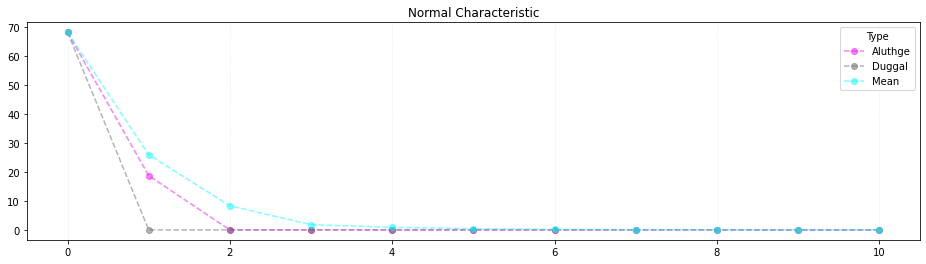

In [59]:
# 2. Infomation Methods and Variables


#Ex_4.total_info

#Ex_4.Aluthge_info

#Ex_4.Duggal_info

#Ex_4.Mean_info

#Ex_4.norm_info

#Ex_4.normal_info

#Ex_4.Process(k=1, Type="Aluthge")

Ex_4.Normal_plot()




#### Example 5. Non-invertible Matrix

---

In [47]:
# Ex5
# Non-Invertible matrix

# 1. Calculation Methods

T = np.matrix([[0,2,-1],[3,-2,1],[3,2,-1]])

Ex_5=Transformation()

Ex_5.Transform(T,10)

Ex_5.Normal_calculator()


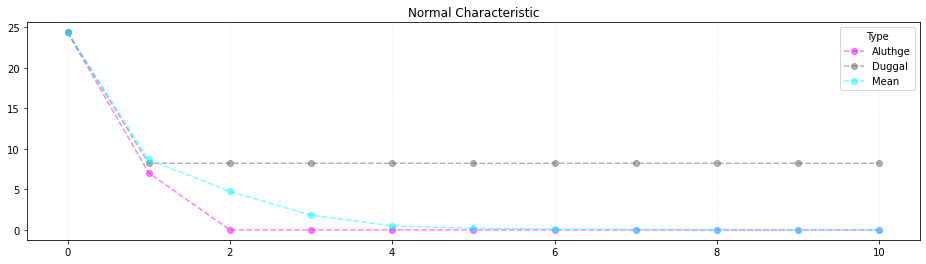

In [61]:
# 2. Infomation Methods and Variables


#Ex_5.total_info

#Ex_5.Aluthge_info

#Ex_5.Duggal_info

#Ex_5.Mean_info

#Ex_5.norm_info

#Ex_5.normal_info

#Ex_5.Process(k=1, Type="Aluthge")

Ex_5.Normal_plot()

#### Example 6. Normal and Invertible Matrix

---

In [46]:
# Ex6
# Normal and Invertable matrix

# 1. Calculation Methods

T = np.matrix([[1j,-2-3j],[2-3j,0]])

Ex_6=Transformation()

Ex_6.Transform(T,10)

Ex_6.Normal_calculator()

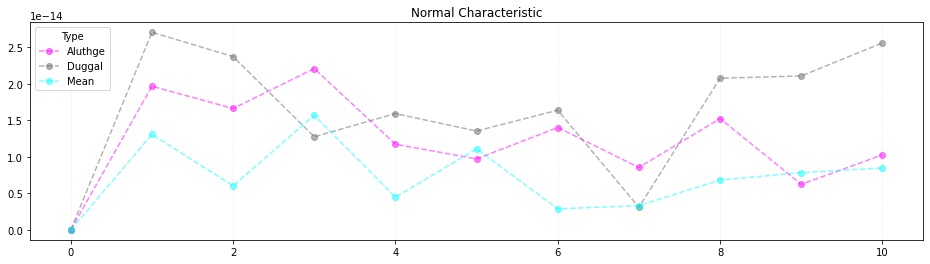

In [62]:
# 2. Infomation Methods and Variables


#Ex_6.total_info

#Ex_6.Aluthge_info

#Ex_6.Duggal_info

#Ex_6.Mean_info

#Ex_6.norm_info

#Ex_6.normal_info

#Ex_6.Process(k=1, Type="Aluthge")

Ex_6.Normal_plot()

#scale : 1e-14 -> Be careful!


#### Example 7. Non-invertible Matrix

---

In [45]:
# Ex7 
# Non-Invertable matrix

# 1. Calculation Methods

T = np.matrix([[1,2,0],[3,-1,2],[-2,3,-2]])

Ex_7=Transformation()

Ex_7.Transform(T,10,check_u=1)

Ex_7.Normal_calculator()

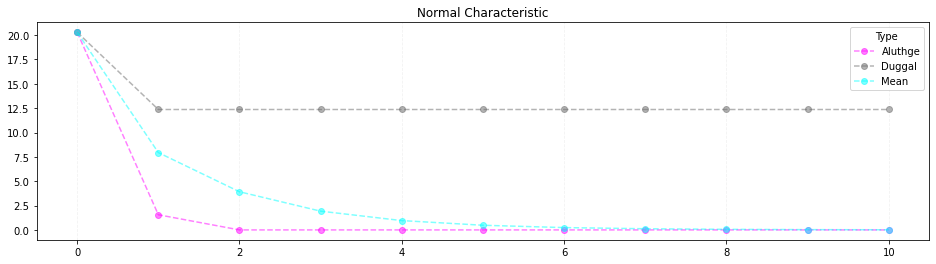

In [63]:
# 2. Infomation Methods and Variables


#Ex_7.total_info

#Ex_7.Aluthge_info

#Ex_7.Duggal_info

#Ex_7.Mean_info

#Ex_7.norm_info

#Ex_7.normal_info

#Ex_7.Process(k=1, Type="Aluthge")

Ex_7.Normal_plot()

